In [ ]:
# Suppress warnings in Jupyter Notebooks
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')

import numpy as np
import pandas as pd

# Load Dataset

In [3]:
CSV_HEADER = [
                "sepal_length",
                "sepal_width",
                "petal_length",
                "petal_width",
                "class" ]

In [4]:
train_data_url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/bezdekIris.data")
df = pd.read_csv(train_data_url, header=None, names=CSV_HEADER)

test_data_url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/bezdekIris.data")
test_data = pd.read_csv(test_data_url, header=None, names=CSV_HEADER)

print(f"Train dataset shape: {df.shape}")
print(f"Test dataset shape: {test_data.shape}")

Train dataset shape: (150, 5)
Test dataset shape: (150, 5)


In [5]:
print(); print(df.shape)
print(); print(df.head())
print(); print(df.columns.values)


(150, 5)

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

['sepal_length' 'sepal_width' 'petal_length' 'petal_width' 'class']


In [6]:
print(); print(test_data.shape)
print(); print(test_data.head())
print(); print(test_data.columns.values)


(150, 5)

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

['sepal_length' 'sepal_width' 'petal_length' 'petal_width' 'class']


In [7]:
df.groupby(["class"]).count()


,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


In [8]:
test_data.groupby(["class"]).count()

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Profiling dataset and EDA with visualisation

In [11]:
import pandas_profiling
df.profile_report()

ModuleNotFoundError: No module named 'pandas_profiling'

# Train and Test data split using H2O

In [12]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /home/sysadm/.local/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmplehrsndd
  JVM stdout: /tmp/tmplehrsndd/h2o_sysadm_started_from_python.out
  JVM stderr: /tmp/tmplehrsndd/h2o_sysadm_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,29 days
H2O_cluster_name:,H2O_from_python_sysadm_2bohco
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.906 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [13]:
# Convert to h2o dataframe
hf = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [14]:
# Data Transform - Split train : test datasets
train, valid = hf.split_frame(ratios = [.80], seed = 1234)
print("Training Dataset", train.shape)
print("Validation Dataset", valid.shape)

Training Dataset (123, 5)
Validation Dataset (27, 5)


In [15]:
train.head(5)

sepal_length,sepal_width,petal_length,petal_width,class
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
5,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa


In [16]:
valid.head(5)

sepal_length,sepal_width,petal_length,petal_width,class
4.6,3.1,1.5,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
5.8,4,1.2,0.2,Iris-setosa
5.1,3.5,1.4,0.3,Iris-setosa
5.7,3.8,1.7,0.3,Iris-setosa


In [17]:
# Identify predictors and response
featureColumns = train.columns
targetColumn   = "class"
featureColumns.remove(targetColumn)

In [18]:
print("Feature Columns : ");     print(featureColumns)
print("\n\nTarget Column : ");   print(targetColumn)

Feature Columns : 
['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


Target Column : 
class


# Training with AutoML (H2O) Model for Structre Dataset (Tabular dataset)

In [19]:
import time
from h2o.automl import H2OAutoML

localtime = time.asctime( time.localtime(time.time()) )
print("Local current time :", localtime)
print()
        
# Run AutoML for YY base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=15, seed=1234, exclude_algos = ["StackedEnsemble"],
                balance_classes = True
               )
aml.train(x=featureColumns, y=targetColumn, training_frame = train, validation_frame = valid)

localtime = time.asctime( time.localtime(time.time()) )
print()
print("Local current time :", localtime)

Local current time : Fri Mar 22 02:18:28 2024

AutoML progress: |
02:18:28.809: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

██
02:18:34.205: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 123.0.

█████████████████████████████████████████████████████████████| (done) 100%

Local current time : Fri Mar 22 02:18:57 2024


model_id                                               mean_per_class_error    logloss      rmse        mse
DeepLearning_grid_1_AutoML_1_20240322_21828_model_1               0.0166667  0.0656317  0.138068  0.0190627
XGBoost_2_AutoML_1_20240322_21828                                 0.0308511  0.202801   0.211878  0.0448923
XRT_1_AutoML_1_20240322_21828                                     0.0391844  0.111267   0.181906  0.0330897
GLM_1_AutoML_1_20240322_21828                                     0.0391844  0.0802971  0.159766  0.0255252
XGBoost_grid_1_AutoML_1_20240322_21828_model_1                    0.0404255  0.227903   0.233957  0.054736
XGBoost_3_AutoML_1_20240322_21828                                 0.0475177  0.157975   0.202991  0.0412052
DRF_1_AutoML_1_20240322_21828                                     0.0475177  0.107699   0.184541  0.0340552
GBM_3_AutoML_1_20240322_21828                                     0.0546099  0.133798   0.20549   0.0422263
GBM_4_AutoML_1_20240322_21828

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,mean_per_class_error,logloss,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
DeepLearning_grid_1_AutoML_1_20240322_21828_model_1,0.0333333,0.182941,0.197717,0.0390919,2226,0.037785,DeepLearning
GLM_1_AutoML_1_20240322_21828,0.0333333,0.0869209,0.167089,0.0279189,197,0.030208,GLM
DeepLearning_1_AutoML_1_20240322_21828,0.111111,0.143276,0.205047,0.0420441,108,0.023487,DeepLearning
XGBoost_grid_1_AutoML_1_20240322_21828_model_2,0.133333,0.551598,0.429303,0.184301,129,0.026708,XGBoost
XGBoost_3_AutoML_1_20240322_21828,0.144444,0.188954,0.232099,0.0538701,165,0.045591,XGBoost
GBM_3_AutoML_1_20240322_21828,0.144444,0.38639,0.25892,0.0670396,160,0.061055,GBM
XRT_1_AutoML_1_20240322_21828,0.144444,0.116905,0.20258,0.0410387,40,0.019735,DRF
DRF_1_AutoML_1_20240322_21828,0.144444,0.0981993,0.18437,0.0339925,115,0.018763,DRF
GBM_grid_1_AutoML_1_20240322_21828_model_1,0.144444,0.469433,0.267992,0.0718197,133,0.064154,GBM
GBM_4_AutoML_1_20240322_21828,0.144444,0.620747,0.270119,0.0729645,192,0.06754,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DeepLearning_grid_1_AutoML_1_20240322_21828_model_1

Iris-setosa,Iris-versicolor,Iris-virginica,Error,Rate
14.0,0.0,0.0,0.0,0 / 14
0.0,9.0,1.0,0.1,1 / 10
0.0,0.0,3.0,0.0,0 / 3
14.0,9.0,4.0,0.0370370,1 / 27


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

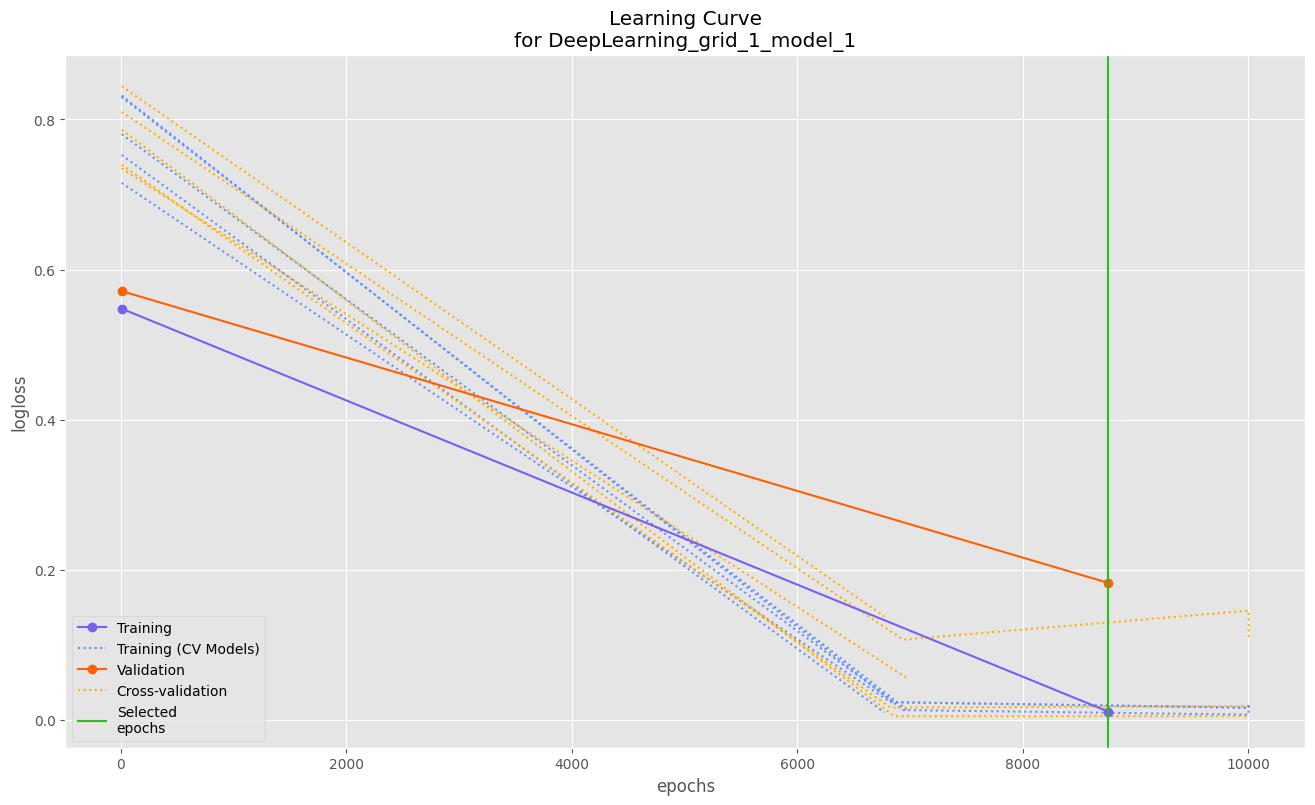

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

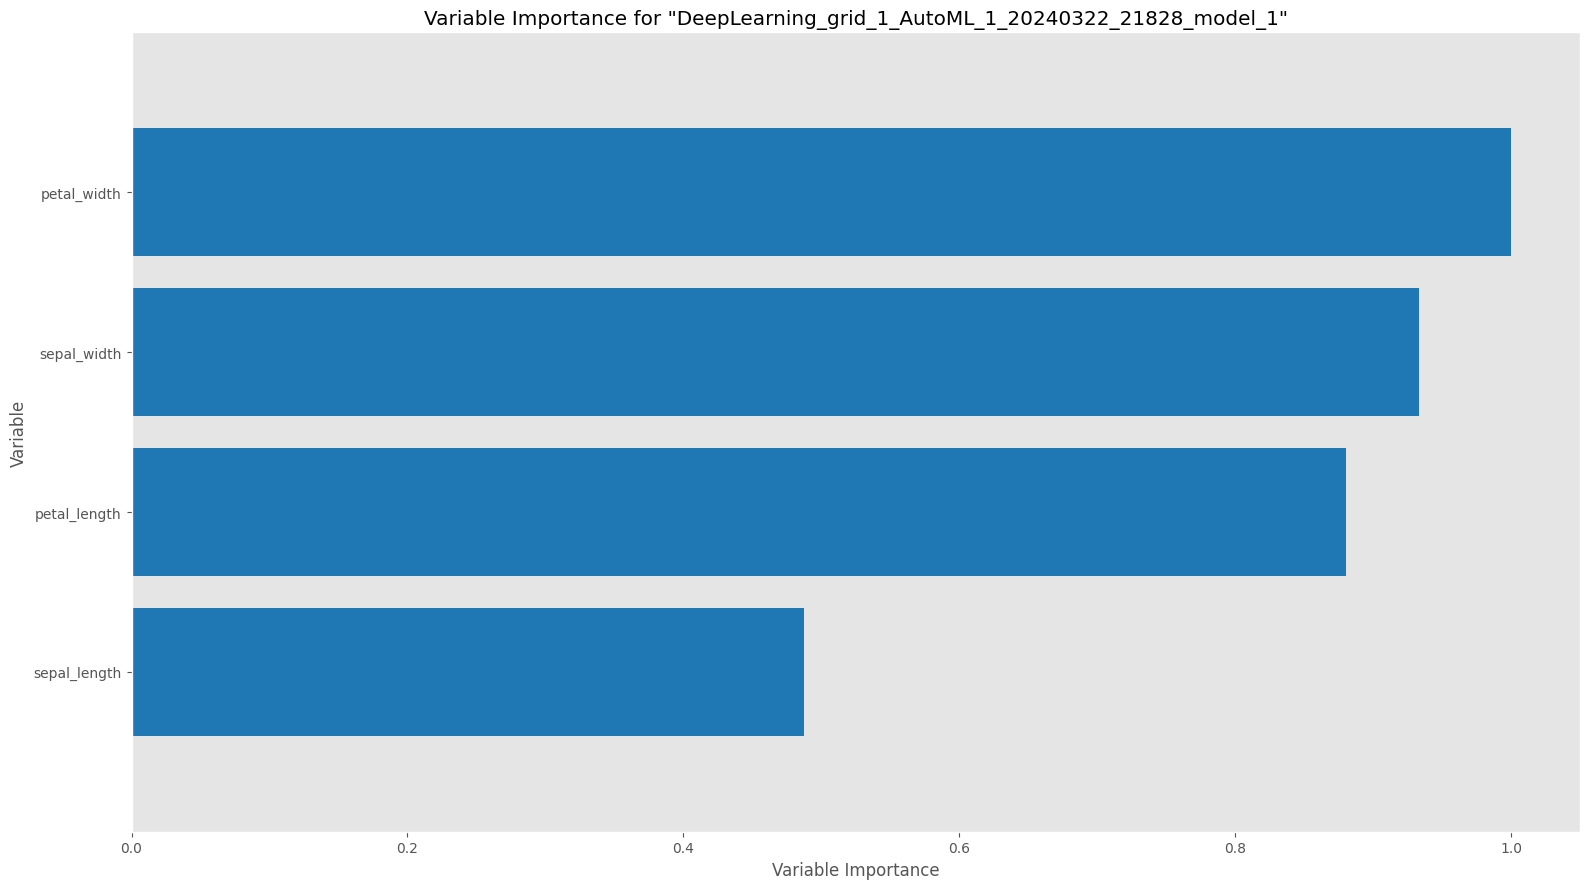

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

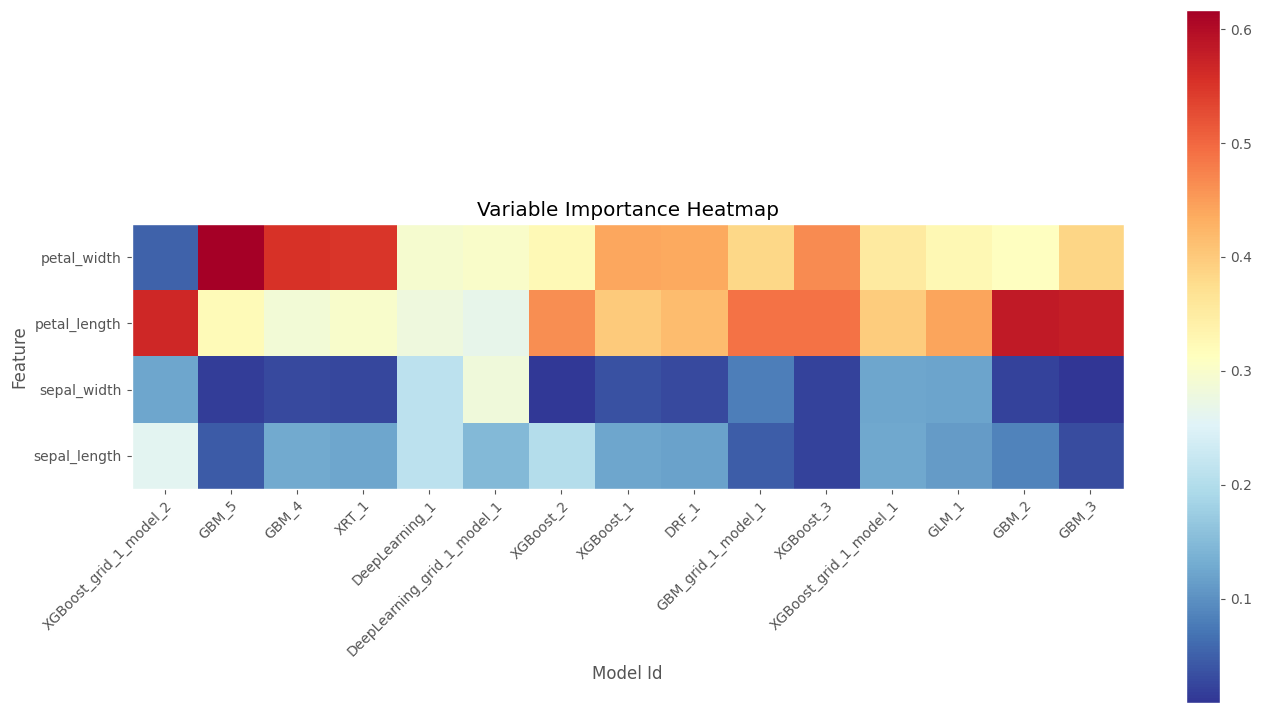

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

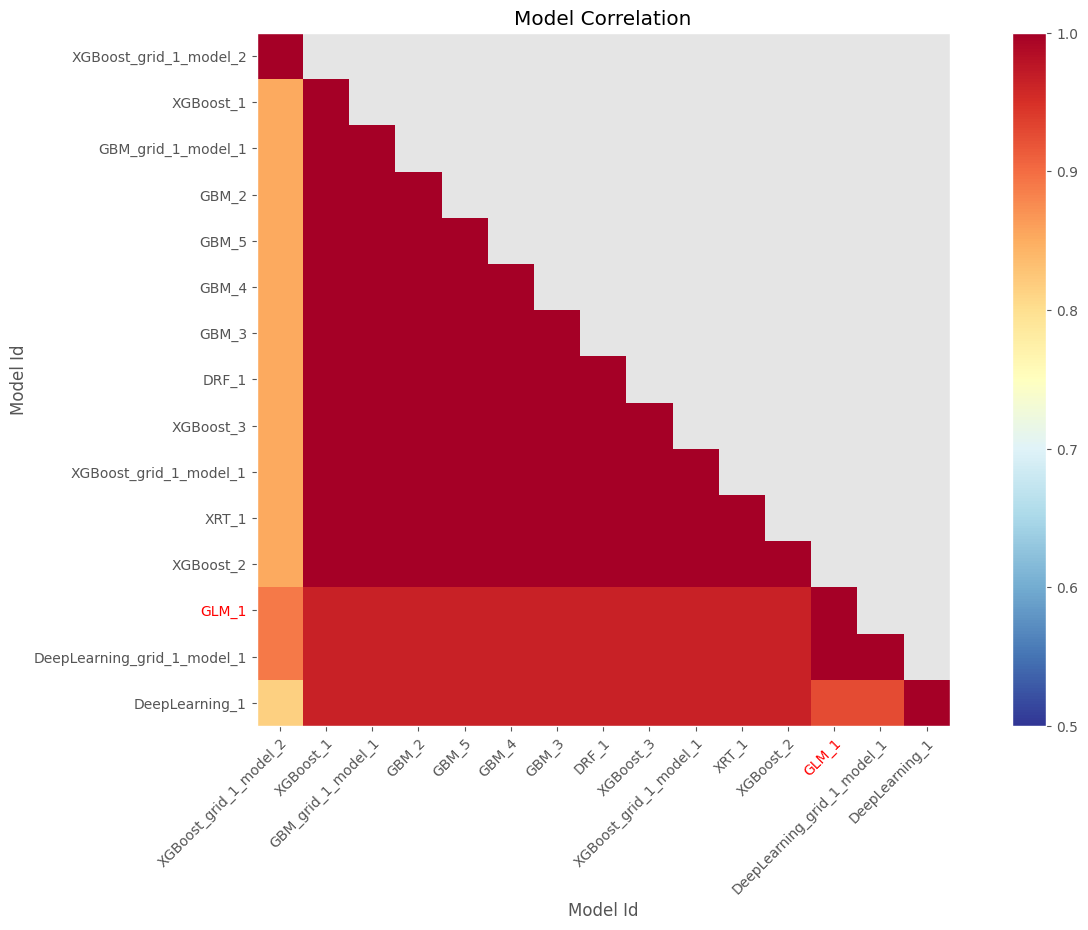

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

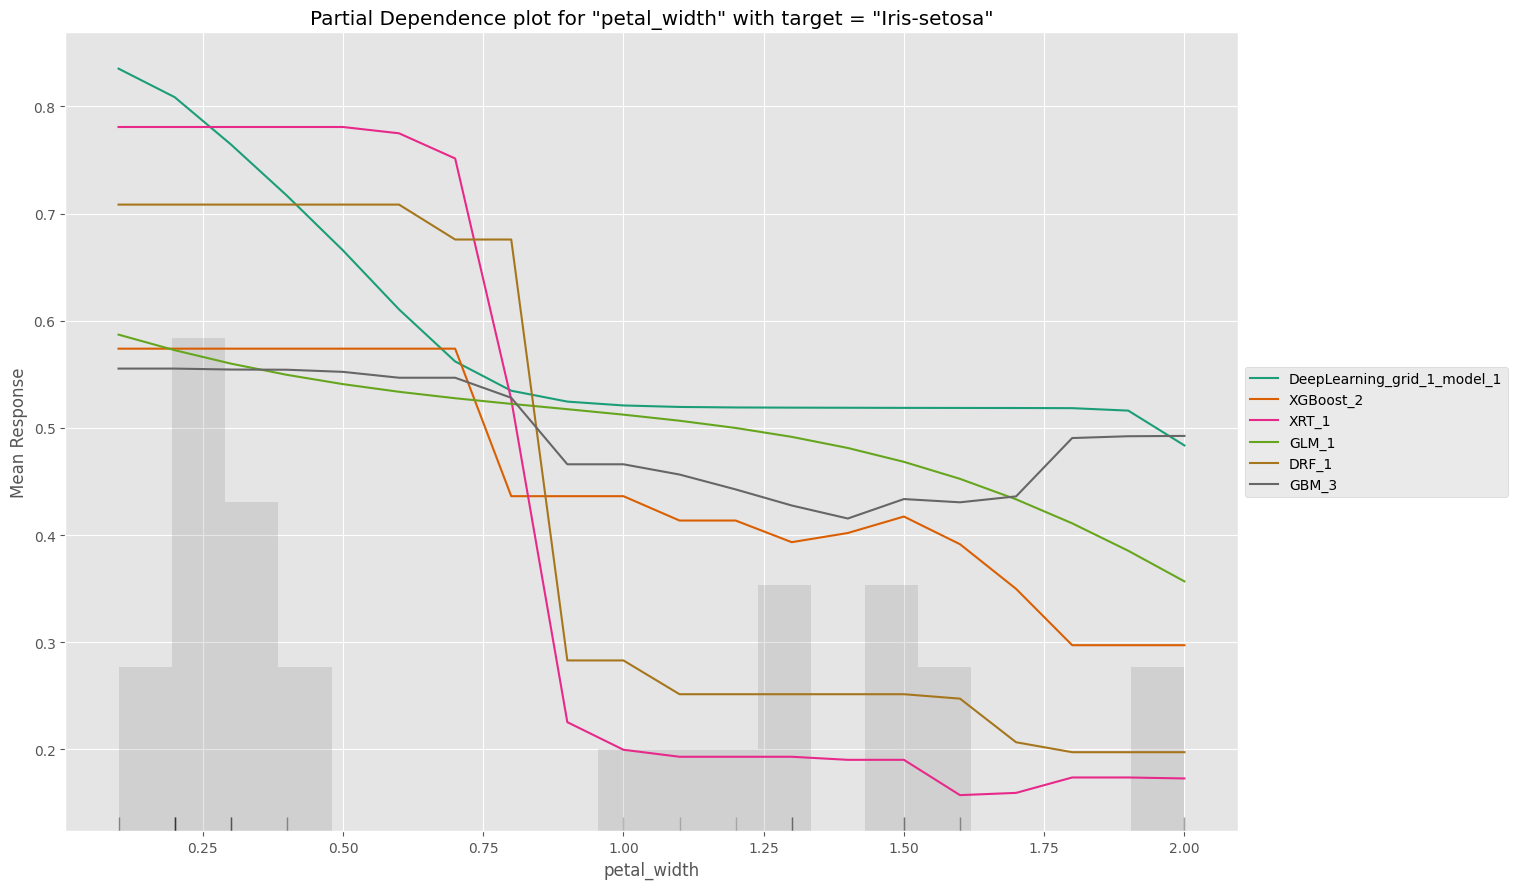

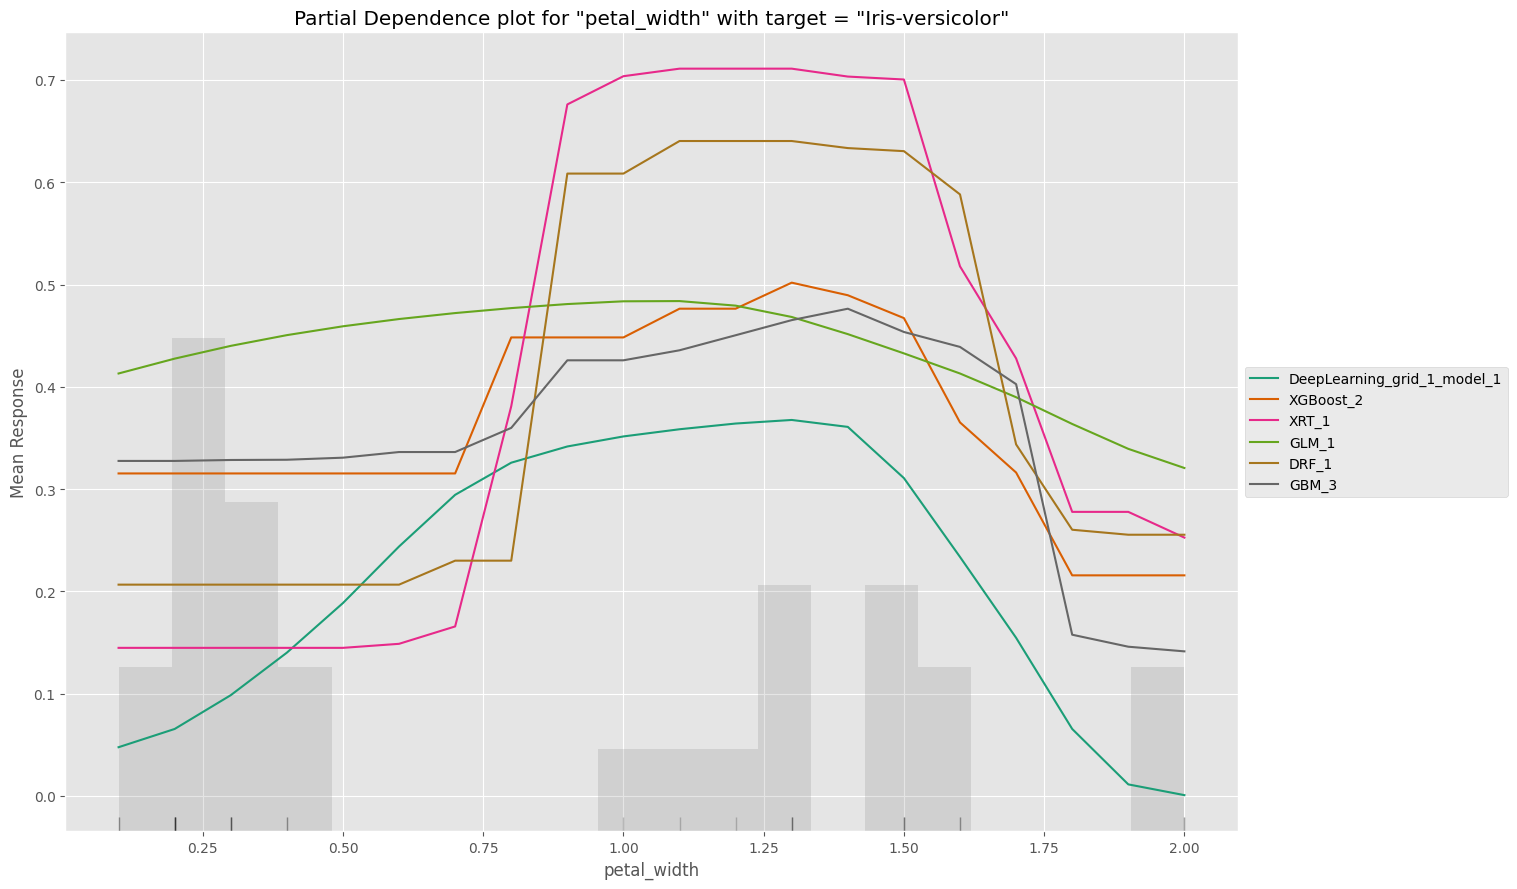

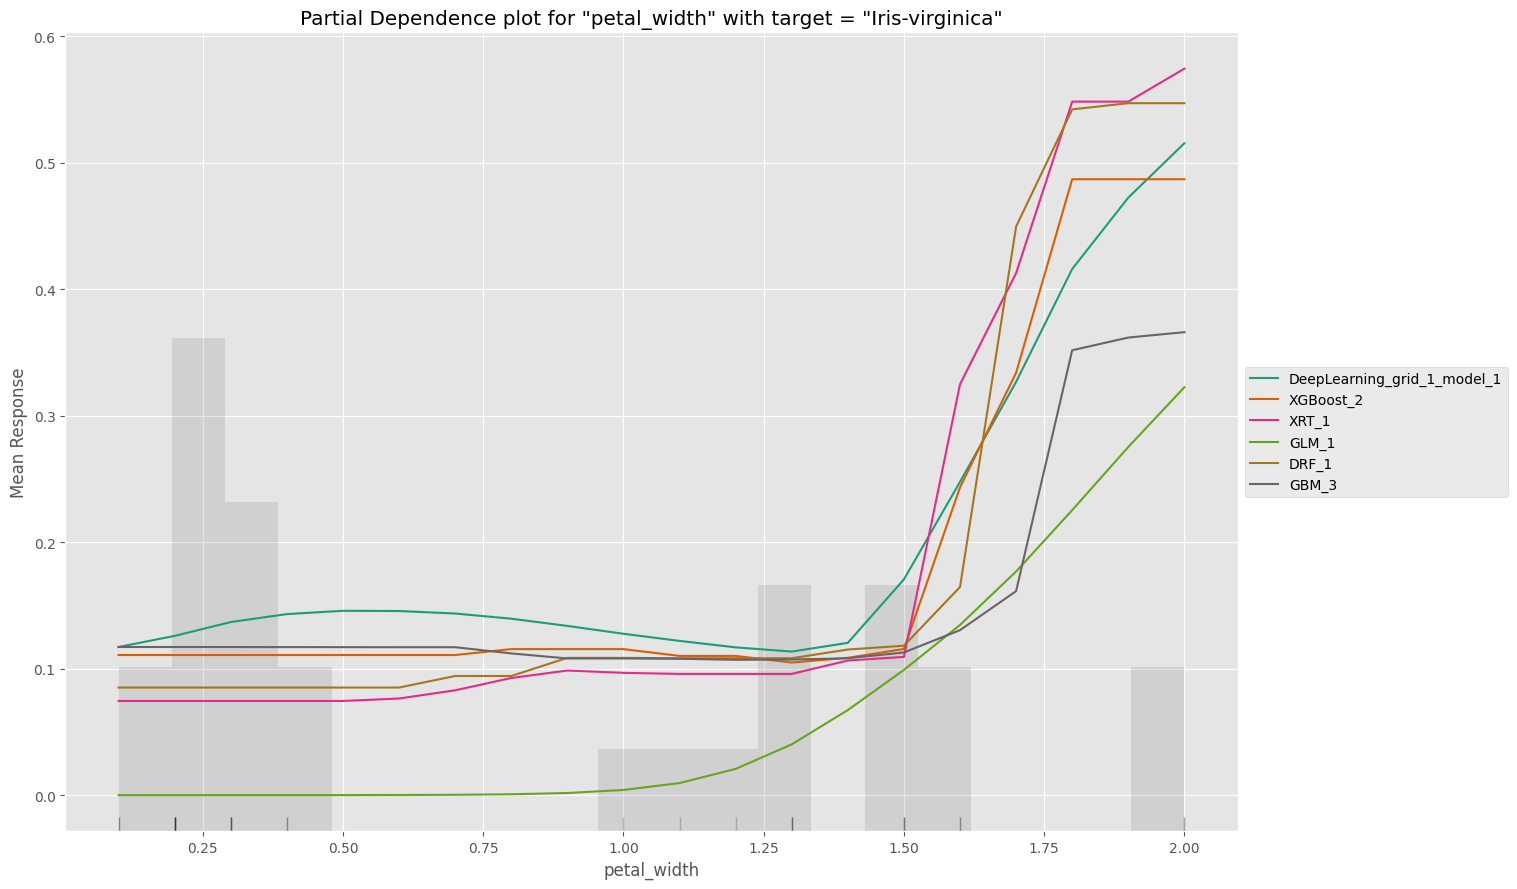

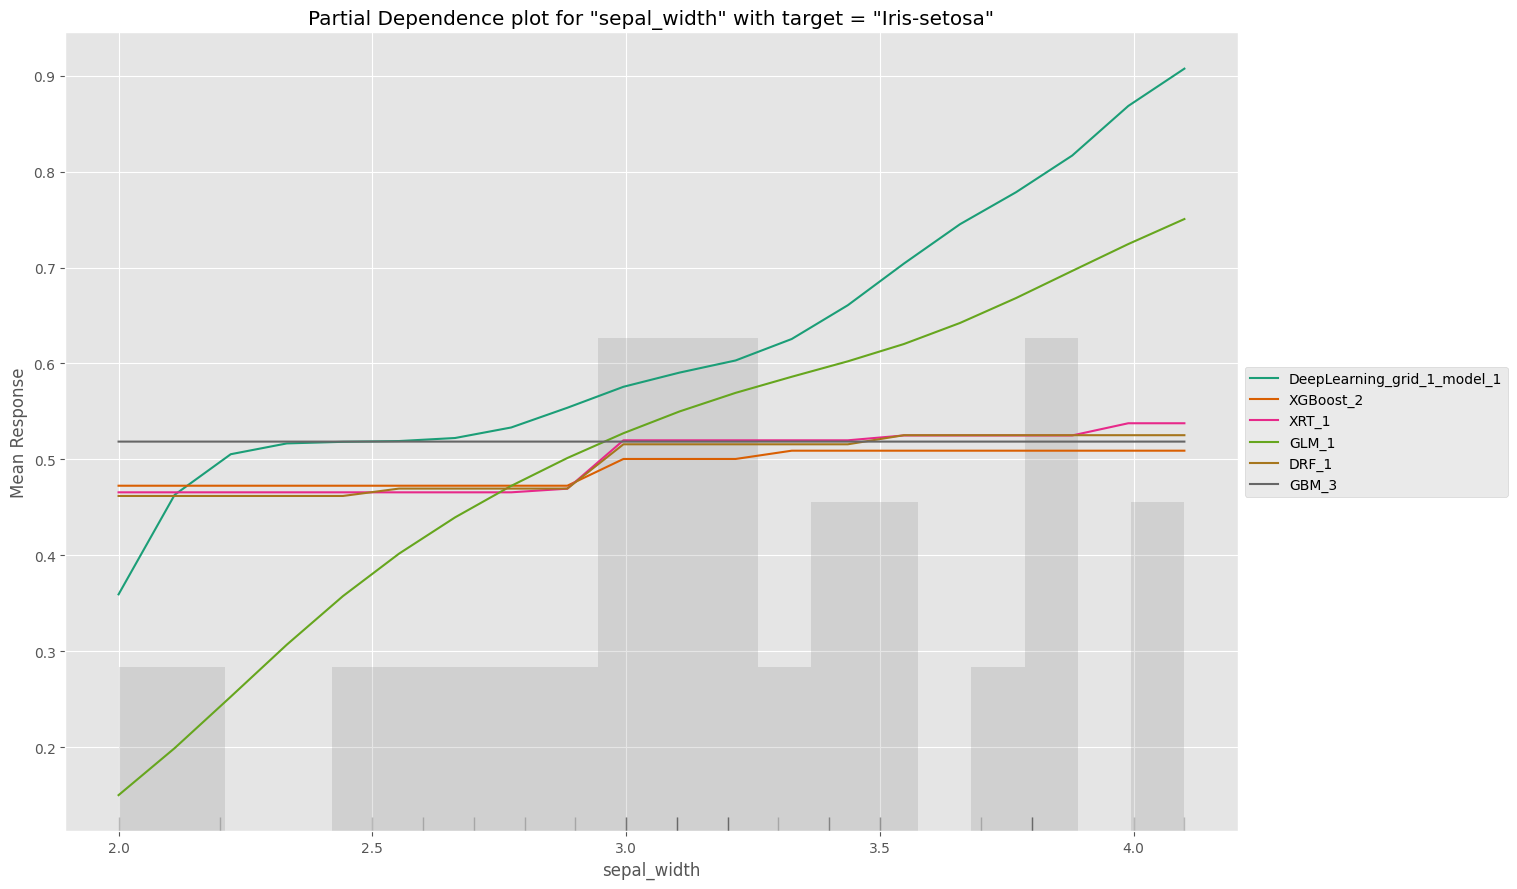

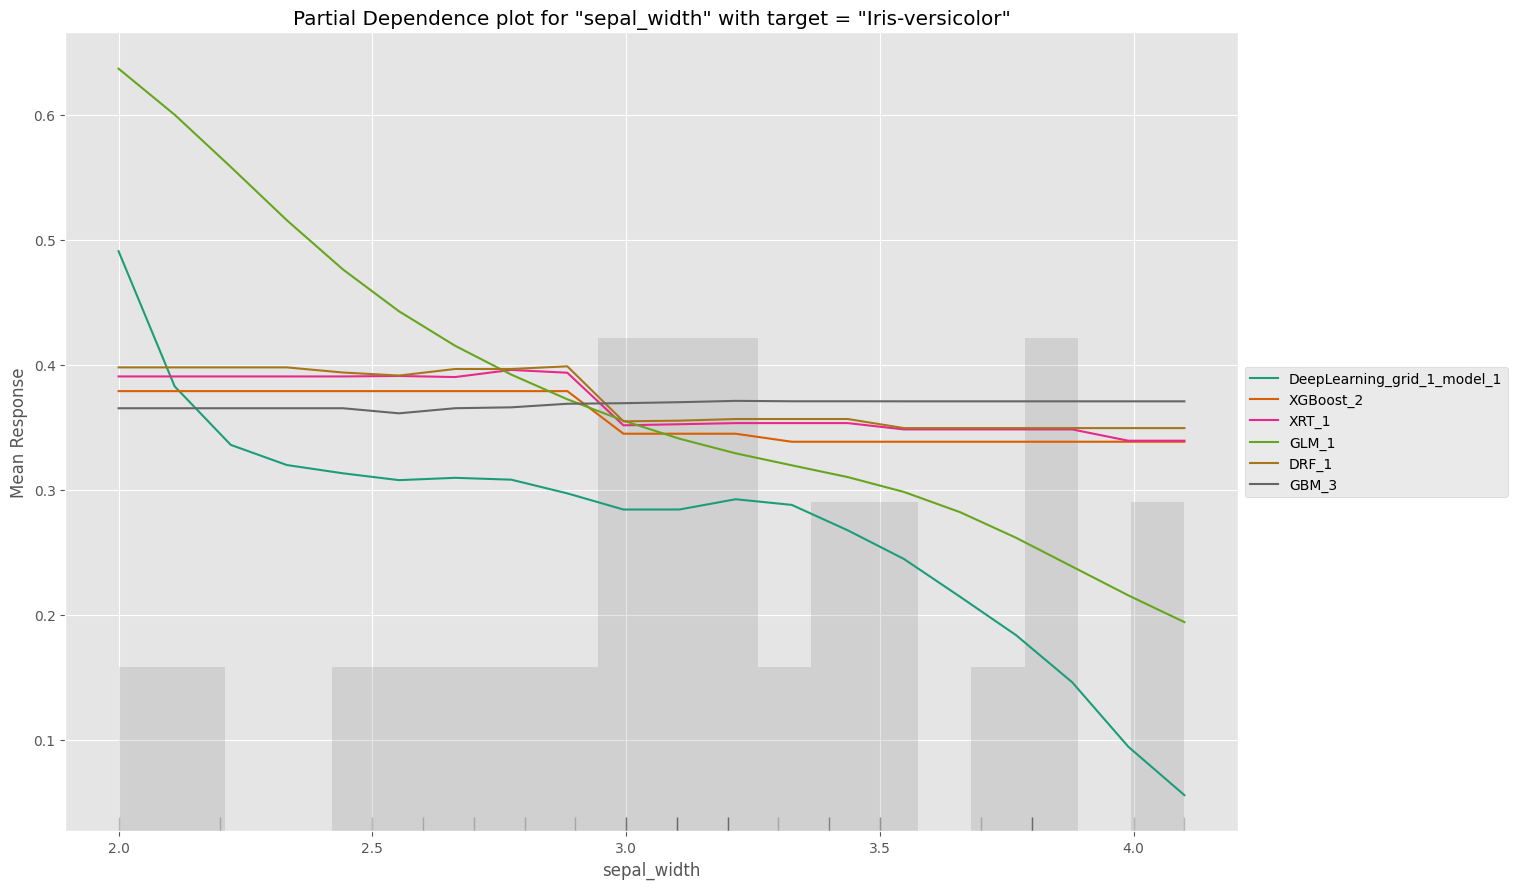

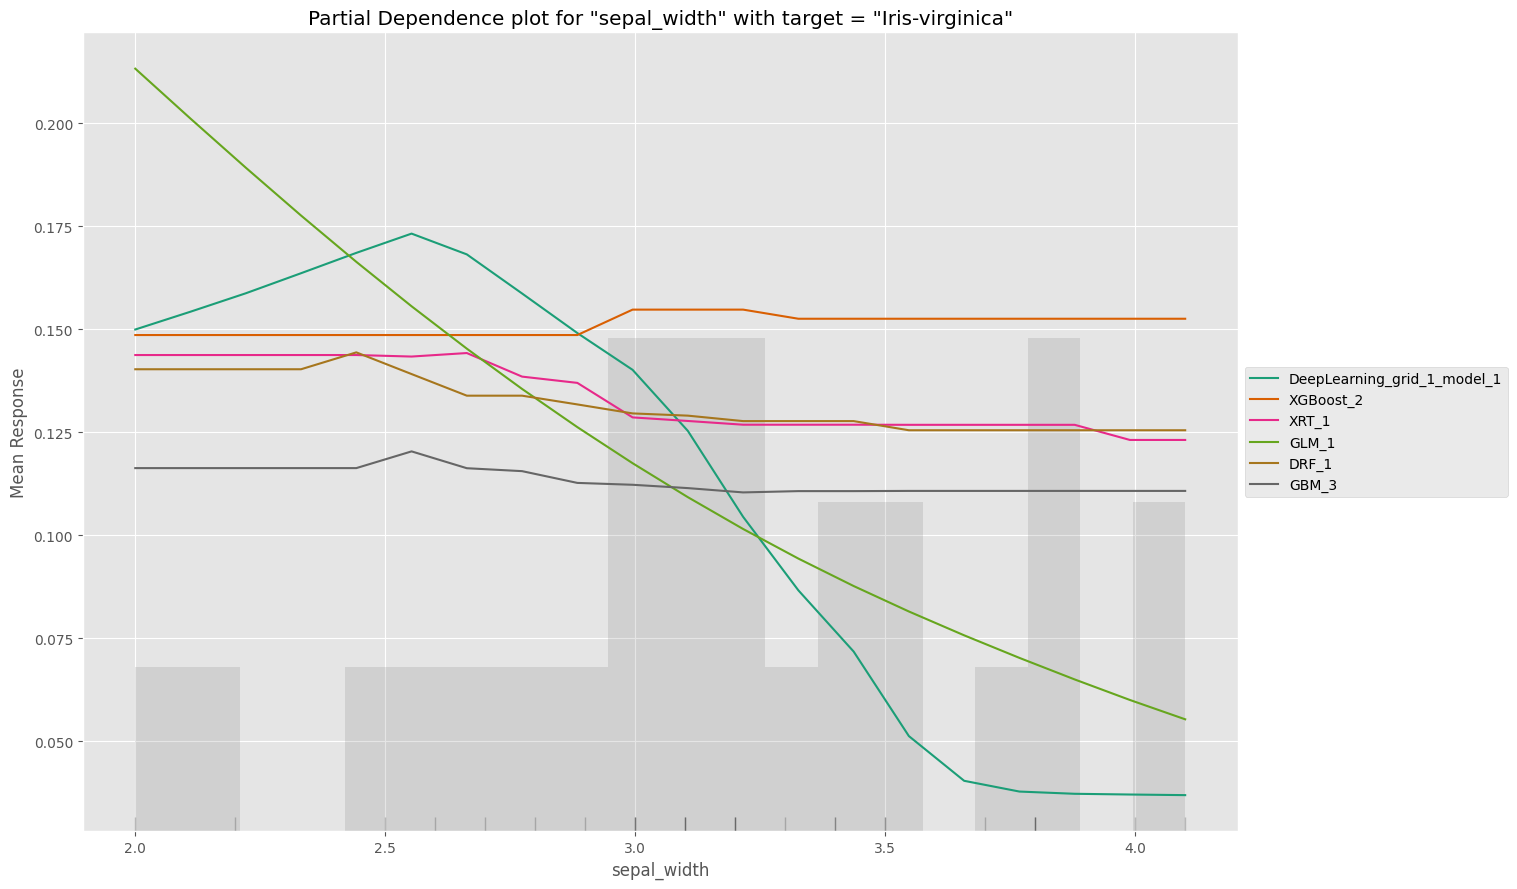

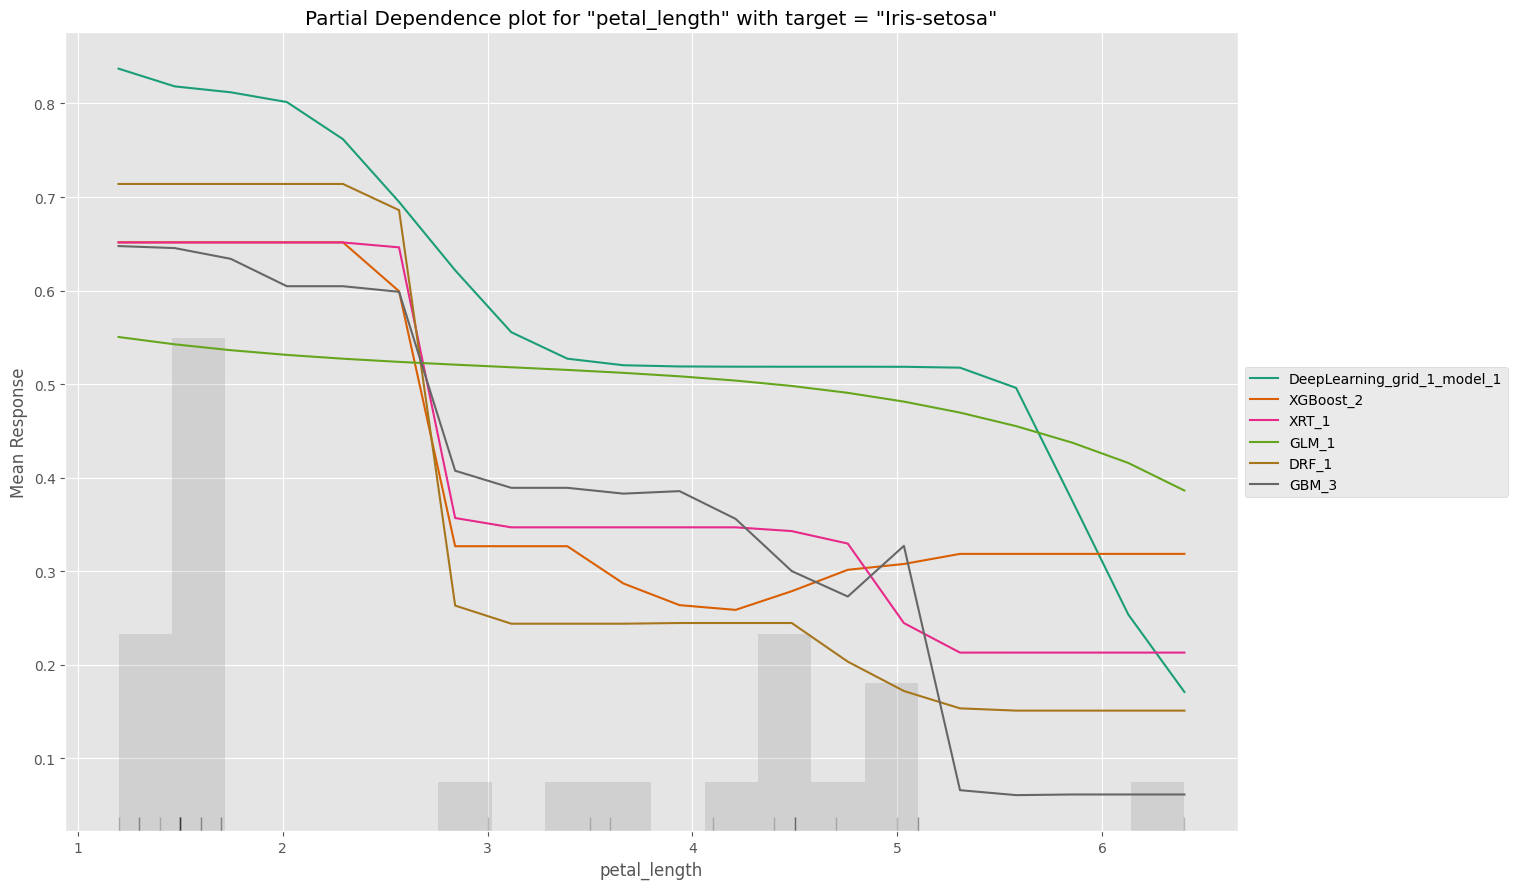

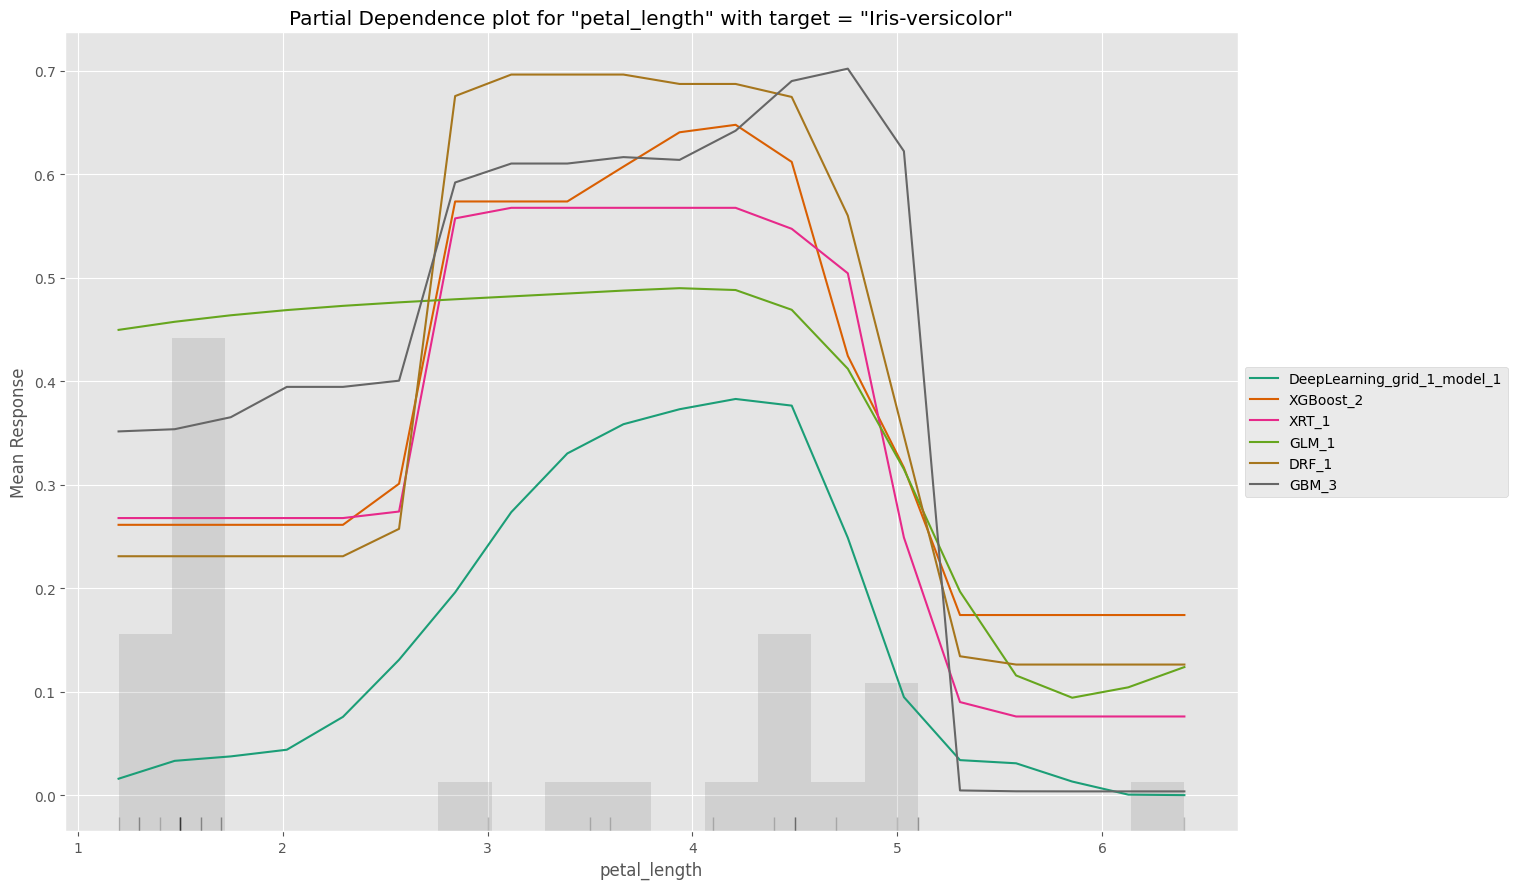

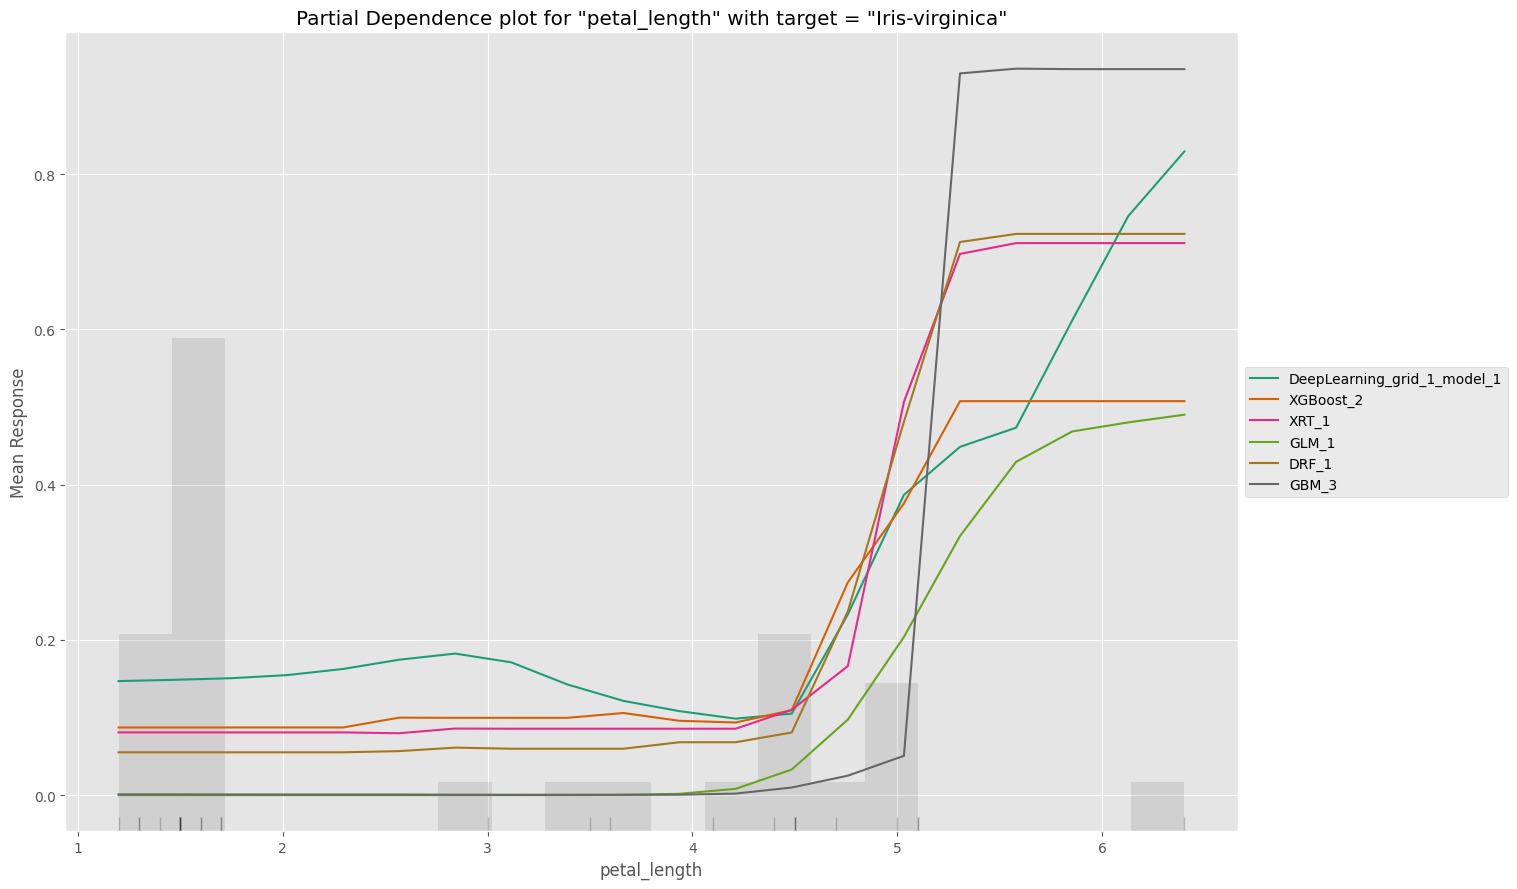

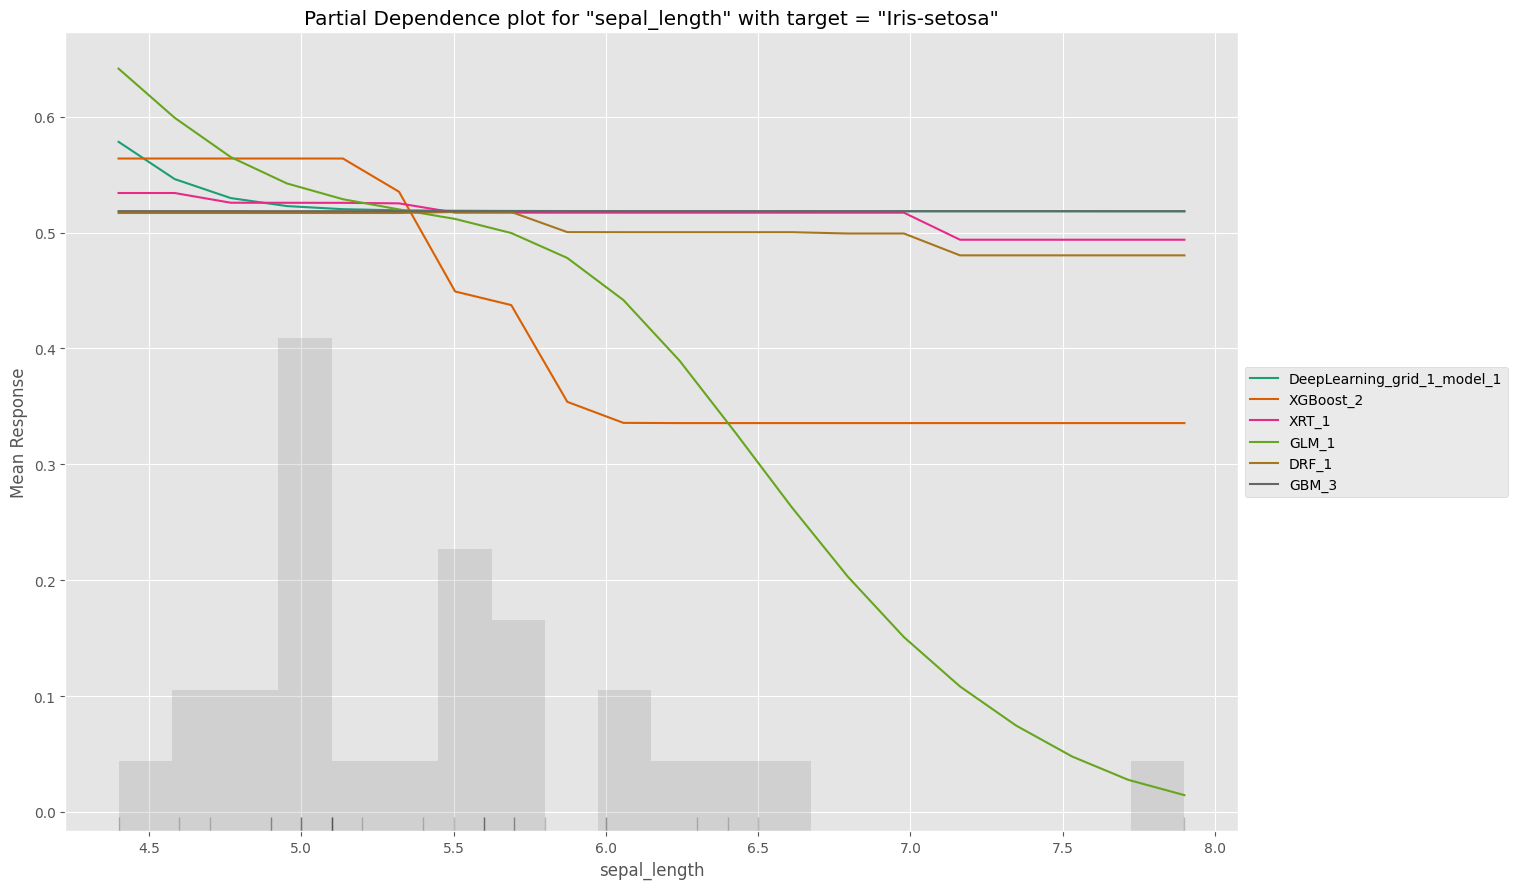

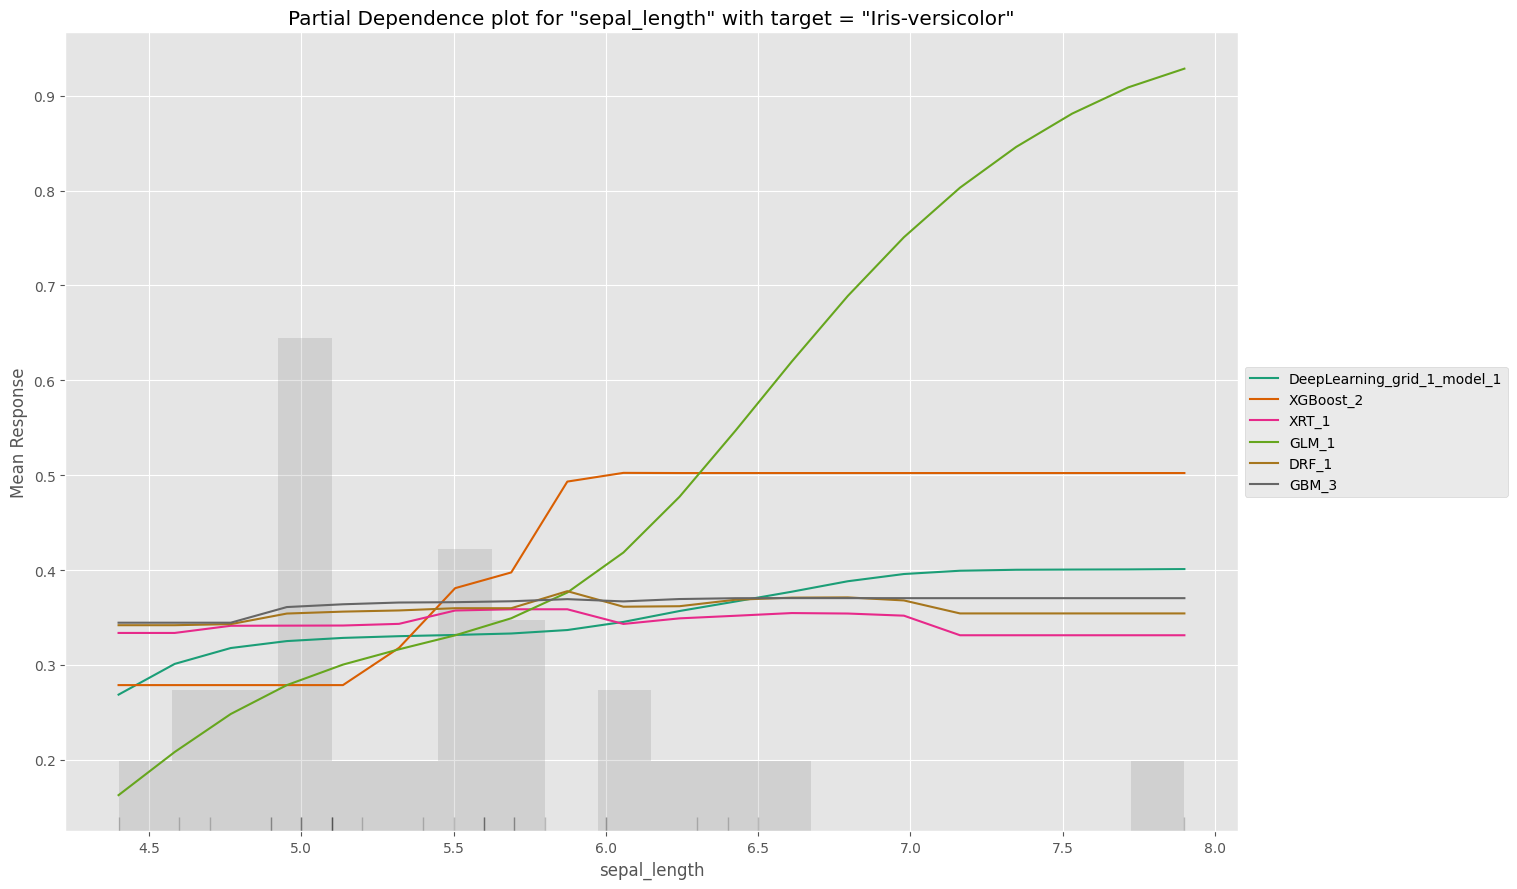

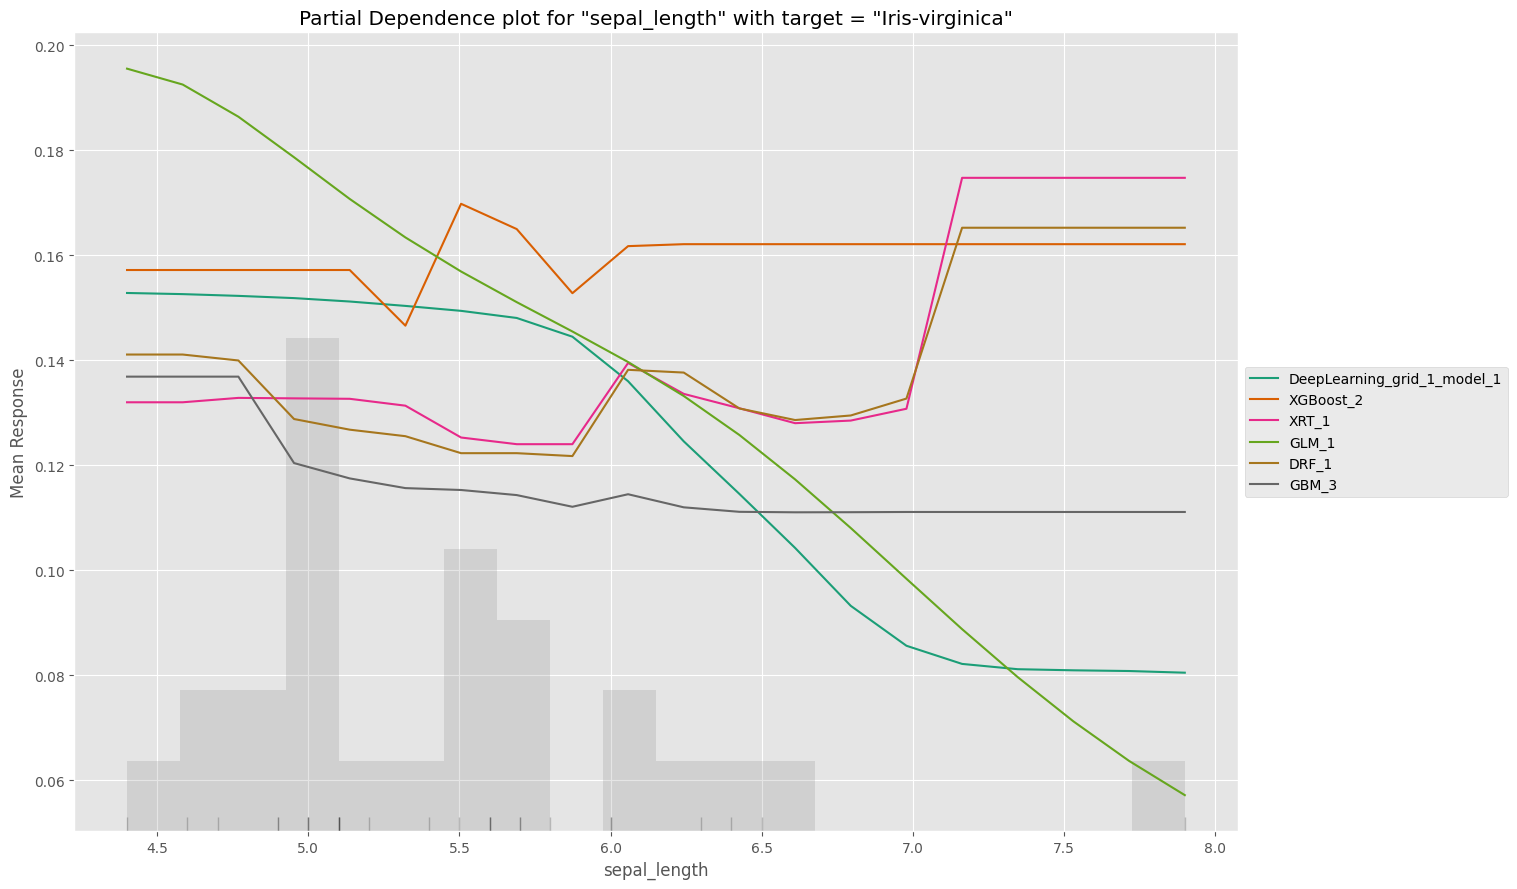

In [20]:
lb = aml.leaderboard
print(lb.head(rows = lb.nrows))

# Explain an AutoML object i.e. explain all models
# exa = aml.explain(valid)

# save all models
#model_ids = list(lb['model_id'].as_data_frame().iloc[:,0])
#for m_id in model_ids:
#    mdl = h2o.get_model(m_id)
#    h2o.save_model(model=mdl, path=os.getcwd(), force=True)
#h2o.export_file(lb, os.path.join(os.getcwd(), 'aml_leaderboard.h2o'), force=Tr

# Performance of the AutoML (H2O) Model

In [21]:
# Evaluate the best model with testing data.
model = aml.leader 

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%

Testing Results of the trained model: 

Accuracy :  0.9629629629629629

Confusion Matrix :
 [[14  0  0]
 [ 0  9  1]
 [ 0  0  3]]

Classification Report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.75      1.00      0.86         3

       accuracy                           0.96        27
      macro avg       0.92      0.97      0.93        27
   weighted avg       0.97      0.96      0.96        27



/home/biswajitrana/.local/lib/python3.10/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/home/biswajitrana/.local/lib/python3.10/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  w

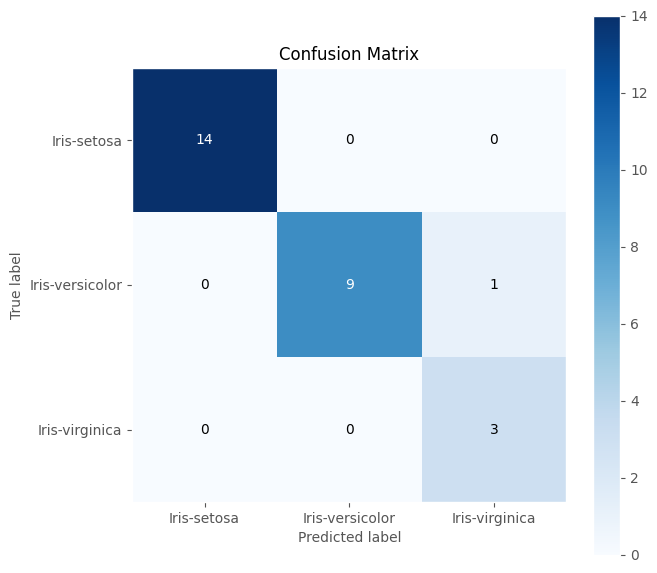

In [25]:
import scikitplot as skplt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import cohen_kappa_score, confusion_matrix

# Predict with the best model.
predicted_y = model.predict(valid[featureColumns])

predicted_data = predicted_y.as_data_frame()
valid_dataset = valid.as_data_frame()

# Evaluate the skill of the Trained model
acc                 = accuracy_score(valid_dataset[targetColumn], predicted_data['predict'])
classReport         = classification_report(valid_dataset[targetColumn], predicted_data['predict'])
confMatrix          = confusion_matrix(valid_dataset[targetColumn], predicted_data['predict']) 
        
print(); print('Testing Results of the trained model: ')
print(); print('Accuracy : ', acc)
print(); print('Confusion Matrix :\n', confMatrix)
print(); print('Classification Report :\n',classReport)

# Confusion matrix
skplt.metrics.plot_confusion_matrix(valid_dataset[targetColumn], predicted_data['predict'], figsize=(7,7)); plt.show()

# Best Model Deep Dive



       variable  percentage
0   petal_width    0.302983
1   sepal_width    0.282775
2  petal_length    0.266647
3  sepal_length    0.147595



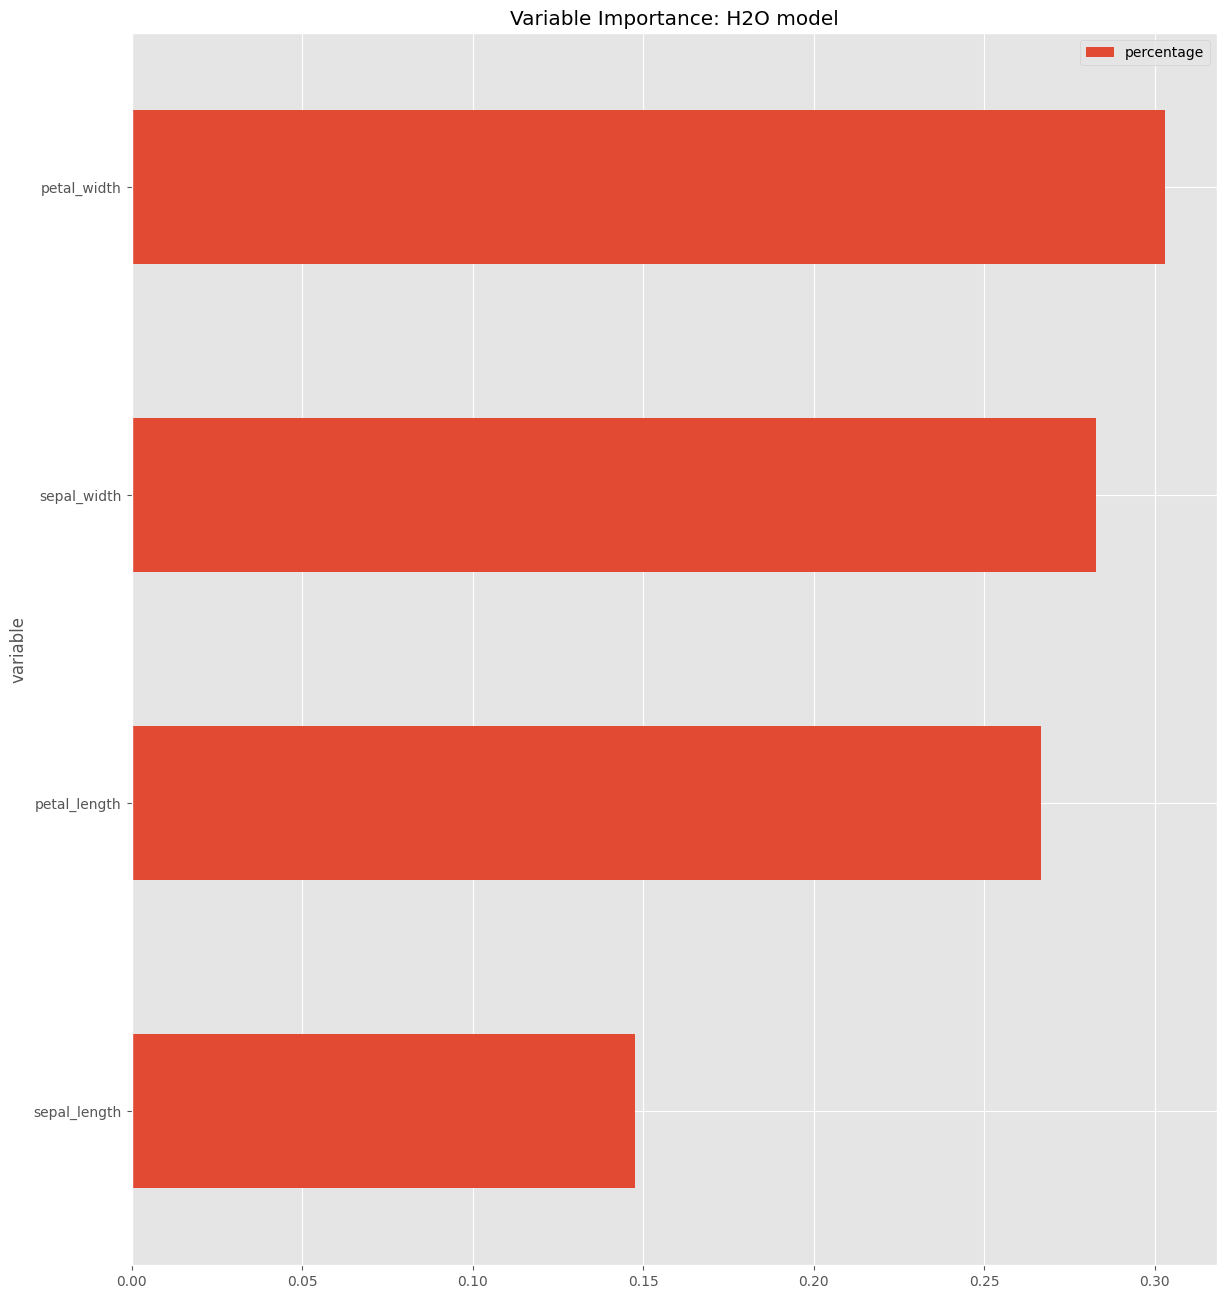

In [26]:
print(); print();
#pd.set_option("display.max_rows", None, "display.max_columns", None)
VI = model.varimp(use_pandas=True)
print(VI[['variable', 'percentage']].head(25))

print()
#pd.set_option("display.max_rows", None, "display.max_columns", None)
VI = model.varimp(use_pandas=True)
VI = VI[['variable', 'percentage']]
VI.head(25).plot(x = 'variable', y = 'percentage', kind = 'barh', figsize = (14,16), grid = True,
                 title = "Variable Importance: H2O model")
plt.gca().invert_yaxis(); plt.show()

In [1]:
# Explain a model
# exm = model.explain(valid)

# Save model

In [28]:
model_path = h2o.save_model(model=model, force=True)
print(model_path)

/home/biswajitrana/Documents/2nd_semester/RKMVERI_2ND/class/ETBDC/h2O/DeepLearning_grid_1_AutoML_1_20240322_21828_model_1


# Load model

In [29]:
saved_model = h2o.load_model(model_path)


# Prediction with the Model

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%

Testing Results of the trained model: 

Accuracy :  0.9933333333333333

Confusion Matrix :
 [[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]

Classification Report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       1.00      0.98      0.99        50
 Iris-virginica       0.98      1.00      0.99        50

       accuracy                           0.99       150
      macro avg       0.99      0.99      0.99       150
   weighted avg       0.99      0.99      0.99       150



/home/biswajitrana/.local/lib/python3.10/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


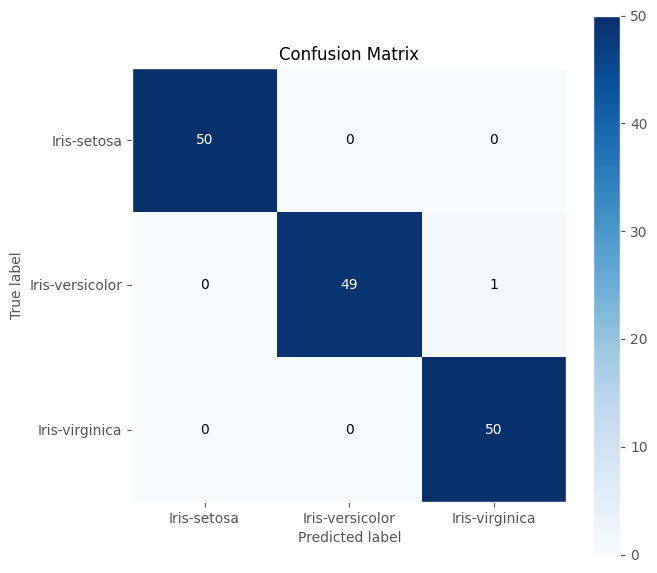

In [30]:
import scikitplot as skplt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import cohen_kappa_score, confusion_matrix

hf = h2o.H2OFrame(test_data)

# Predict with the best model.
predicted_y = model.predict(hf[featureColumns])
predicted_data = predicted_y.as_data_frame()

# Evaluate the skill of the Trained model
acc                 = accuracy_score(test_data[targetColumn], predicted_data['predict'])
classReport         = classification_report(test_data[targetColumn], predicted_data['predict'])
confMatrix          = confusion_matrix(test_data[targetColumn], predicted_data['predict']) 
        
print(); print('Testing Results of the trained model: ')
print(); print('Accuracy : ', acc)
print(); print('Confusion Matrix :\n', confMatrix)
print(); print('Classification Report :\n',classReport)

# Confusion matrix
skplt.metrics.plot_confusion_matrix(test_data[targetColumn], predicted_data['predict'], figsize=(7,7)); plt.show()